## Dataset 1

- Name : Smayan Kulkarni
- Roll no : D100
- SAP ID : 60009230142
- Colab Link : https://colab.research.google.com/github/SmayanKulkarni/AI-and-ML-Course/blob/master/ML-LAB/ML_Lab_6.ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Define Models
dt = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=1000)
ada_dt = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,algorithm='SAMME')
ada_lr = AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50,algorithm='SAMME')

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate Models
models = {'Decision Tree': dt, 'Logistic Regression': lr, 'AdaBoost (DT)': ada_dt, 'AdaBoost (LR)': ada_lr}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f}")

Decision Tree Accuracy: 0.8110
Logistic Regression Accuracy: 0.8030
AdaBoost (DT) Accuracy: 0.8070
AdaBoost (LR) Accuracy: 0.7930


## Dataset 2

In [ ]:
df2 = pd.read_csv('creditcard.csv')

In [ ]:
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df2['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Here we can see that there is a huge imbalance in the dataset. The number of fraudulent transactions is very small compared to the number of non-fraudulent transactions. This is a common issue in fraud detection datasets. Therefore now the model trained on this dataset with be biased towards the output being '0' which means that the transaction was not fraudulent and this may lead to quite a lot of incorrect classifications.




In [ ]:
ada = AdaBoostClassifier(algorithm='SAMME')

In [ ]:
X = df2.drop('Class', axis=1)
y = df2['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [ ]:
y_pred = ada.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.68      0.73        98

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56846    18]
 [   31    67]]


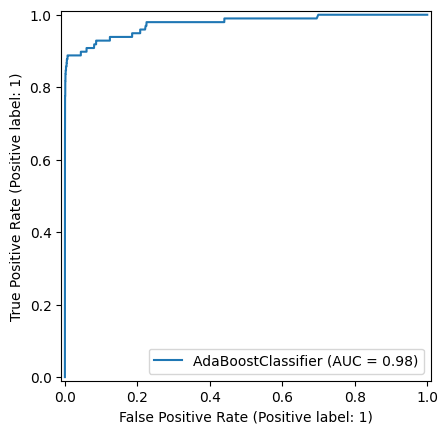

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
RocCurveDisplay.from_estimator(ada, X_test, y_test)
plt.show()

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree_pred = tree.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.82      0.77        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56835    29]
 [   18    80]]


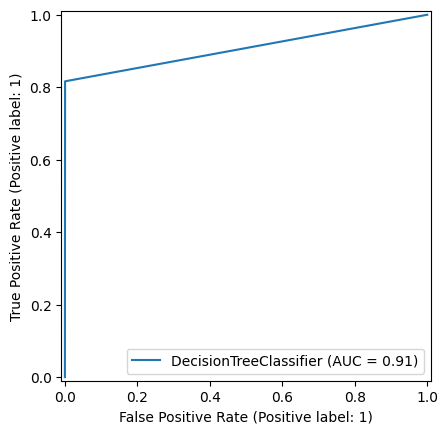

In [ ]:
print(classification_report(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))
RocCurveDisplay.from_estimator(tree, X_test, y_test)
plt.show()

From the above, we can see that the AdaBoost classifier has a better performance than the Decision Tree classifier. The AdaBoost classifier has a higher precision and recall, which means it is better at identifying fraudulent transactions. The confusion matrix also shows that the AdaBoost classifier has fewer false positives and false negatives compared to the Decision Tree classifier.m

#### Adaboost with base learning as Decision Tree Classifier

In [ ]:
ada_tree = AdaBoostClassifier(estimator=DecisionTreeClassifier(),algorithm='SAMME')

In [ ]:
cross = KFold(n_splits=6, shuffle=True, random_state=2384)

In [ ]:
ada_tree.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier())

In [ ]:
ada_tree_preds = ada_tree.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56834    30]
 [   19    79]]


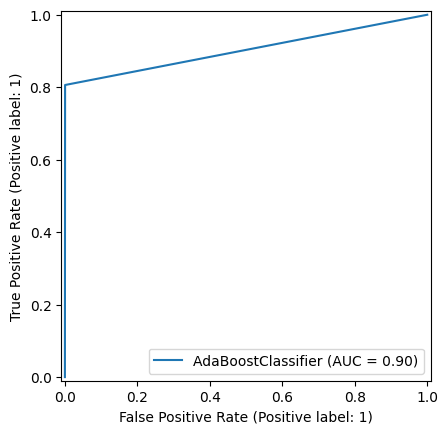

In [ ]:
print(classification_report(y_test, ada_tree_preds))
print(confusion_matrix(y_test, ada_tree_preds))
RocCurveDisplay.from_estimator(ada_tree, X_test, y_test)
plt.show()

In [ ]:
cross_val_score(ada_tree, X, y, cv=cross, scoring='accuracy').mean()

0.9991397672863834

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator__max_depth': [1, 2, 3,4],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search = GridSearchCV(estimator=ada_tree,
                           param_grid=param_grid,
                           cv=cross,
                           scoring='accuracy',
                           n_jobs=-1,
                           return_train_score=True)

grid_search.fit(X, y)

/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=6, random_state=2384, shuffle=True),
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3, 4],
                         'learning_rate': [0.01, 0.1, 0.5]},
             return_train_score=True, scoring='accuracy')

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

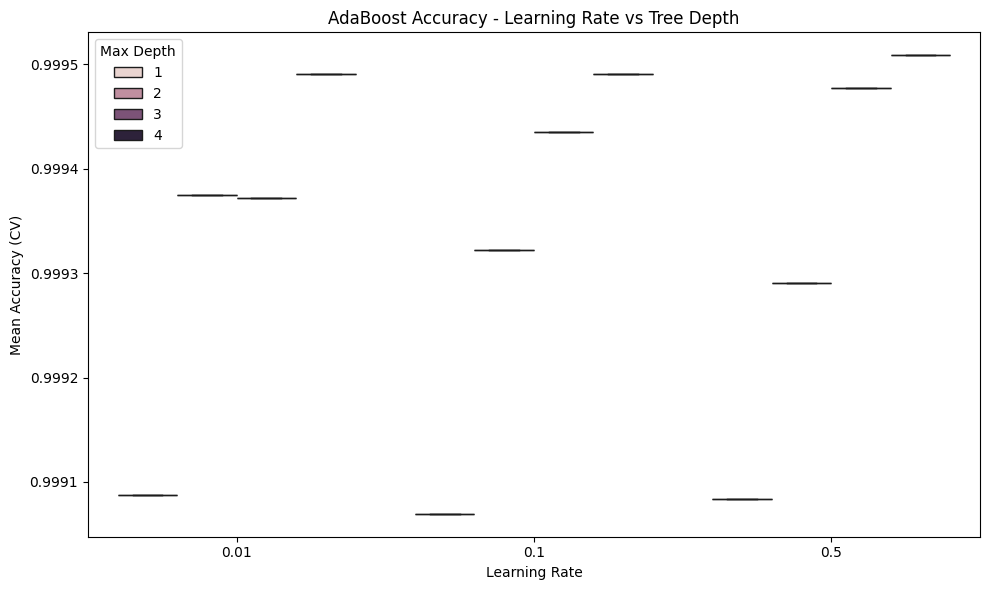

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_learning_rate', y='mean_test_score', hue='param_estimator__max_depth', data=results)
plt.title('AdaBoost Accuracy - Learning Rate vs Tree Depth')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy (CV)')
plt.legend(title='Max Depth')
plt.tight_layout()
plt.show()